## Results evaluation from baseline

In [60]:
import re

In [98]:
# bert model case
with open('../data/chia_bert_log 2.txt') as fd:
    log = fd.read()

lines = log.split('\n')
eval_lines = [line for line in lines if 'full evaluation metrix' in line]

eval_lines

["        full evaluation metrix: {'overall': {'acc': 0.7999, 'strict': {'precision': 0.5863842662632375, 'recall': 0.6398151205018158, 'f_score': 0.6119355857278181}, 'relax': {'precision': 0.7310136157337368, 'recall': 0.7976229778804886, 'f_score': 0.7628670666245659}}, 'category': {'strict': {'condition': {'precision': 0.652555910543131, 'recall': 0.7502295684113865, 'f_score': 0.6979923109782143}, 'procedure': {'precision': 0.4088888888888889, 'recall': 0.5993485342019544, 'f_score': 0.4861294583883752}, 'temporal': {'precision': 0.48656716417910445, 'recall': 0.5361842105263158, 'f_score': 0.5101721439749609}, 'measurement': {'precision': 0.5589225589225589, 'recall': 0.6287878787878788, 'f_score': 0.5918003565062389}, 'value': {'precision': 0.6620111731843575, 'recall': 0.7247706422018348, 'f_score': 0.691970802919708}, 'person': {'precision': 0.773972602739726, 'recall': 0.8129496402877698, 'f_score': 0.7929824561403509}, 'drug': {'precision': 0.5916870415647921, 'recall': 0.72

In [99]:
last_eval = eval_lines[-1]
last_eval

"        full evaluation metrix: {'overall': {'acc': 0.8155, 'strict': {'precision': 0.6268788682581786, 'recall': 0.7022119511389898, 'f_score': 0.6624104640298973}, 'relax': {'precision': 0.7606837606837606, 'recall': 0.8520964014526247, 'f_score': 0.8037994394269697}}, 'category': {'strict': {'condition': {'precision': 0.6882690730106645, 'recall': 0.7704315886134068, 'f_score': 0.7270363951473136}, 'temporal': {'precision': 0.5223097112860893, 'recall': 0.6546052631578947, 'f_score': 0.5810218978102191}, 'procedure': {'precision': 0.5333333333333333, 'recall': 0.6775244299674267, 'f_score': 0.5968436154949784}, 'measurement': {'precision': 0.6423357664233577, 'recall': 0.6666666666666666, 'f_score': 0.654275092936803}, 'value': {'precision': 0.7126760563380282, 'recall': 0.7737003058103975, 'f_score': 0.7419354838709676}, 'observation': {'precision': 0.3333333333333333, 'recall': 0.2732919254658385, 'f_score': 0.3003412969283276}, 'person': {'precision': 0.7894736842105263, 'recall

In [100]:
eval = last_eval.split('full evaluation metrix: ')[1]
eval

"{'overall': {'acc': 0.8155, 'strict': {'precision': 0.6268788682581786, 'recall': 0.7022119511389898, 'f_score': 0.6624104640298973}, 'relax': {'precision': 0.7606837606837606, 'recall': 0.8520964014526247, 'f_score': 0.8037994394269697}}, 'category': {'strict': {'condition': {'precision': 0.6882690730106645, 'recall': 0.7704315886134068, 'f_score': 0.7270363951473136}, 'temporal': {'precision': 0.5223097112860893, 'recall': 0.6546052631578947, 'f_score': 0.5810218978102191}, 'procedure': {'precision': 0.5333333333333333, 'recall': 0.6775244299674267, 'f_score': 0.5968436154949784}, 'measurement': {'precision': 0.6423357664233577, 'recall': 0.6666666666666666, 'f_score': 0.654275092936803}, 'value': {'precision': 0.7126760563380282, 'recall': 0.7737003058103975, 'f_score': 0.7419354838709676}, 'observation': {'precision': 0.3333333333333333, 'recall': 0.2732919254658385, 'f_score': 0.3003412969283276}, 'person': {'precision': 0.7894736842105263, 'recall': 0.8633093525179856, 'f_score'

In [101]:
import json
with open('../data/chia_bert_eval.json', 'w') as fd:
    json.dump(eval, fd, indent=4)

In [137]:
with open('../data/chia_bert_eval.json', 'r') as fd:
    eval_dict = json.load(fd)

In [138]:
print(eval_dict)

{'overall': {'acc': 0.8155, 'strict': {'precision': 0.6268788682581786, 'recall': 0.7022119511389898, 'f_score': 0.6624104640298973}, 'relax': {'precision': 0.7606837606837606, 'recall': 0.8520964014526247, 'f_score': 0.8037994394269697}}, 'category': {'strict': {'condition': {'precision': 0.6882690730106645, 'recall': 0.7704315886134068, 'f_score': 0.7270363951473136}, 'temporal': {'precision': 0.5223097112860893, 'recall': 0.6546052631578947, 'f_score': 0.5810218978102191}, 'procedure': {'precision': 0.5333333333333333, 'recall': 0.6775244299674267, 'f_score': 0.5968436154949784}, 'measurement': {'precision': 0.6423357664233577, 'recall': 0.6666666666666666, 'f_score': 0.654275092936803}, 'value': {'precision': 0.7126760563380282, 'recall': 0.7737003058103975, 'f_score': 0.7419354838709676}, 'observation': {'precision': 0.3333333333333333, 'recall': 0.2732919254658385, 'f_score': 0.3003412969283276}, 'person': {'precision': 0.7894736842105263, 'recall': 0.8633093525179856, 'f_score':

In [108]:
import pandas as pd
eval_df = pd.DataFrame(columns=['type', 'prec_strict', 'rec_strict', 'f1_strict', 'prec_relaxed', 'rec_relaxed', 'f1_relaxed'])

In [109]:
types = ['Overall']
for keys in eval_dict['category']['strict']:
    types.append(keys)
types

['Overall',
 'condition',
 'temporal',
 'procedure',
 'measurement',
 'value',
 'observation',
 'person',
 'mood',
 'drug',
 'pregnancy_considerations',
 'device']

In [110]:
eval_df['type'] = types

In [111]:
pre_strict = [eval_dict['overall']['strict']['precision']]
for keys in eval_dict['category']['strict']:
    pre_strict.append(eval_dict['category']['strict'][keys]['precision'])
eval_df['prec_strict'] = pre_strict

In [112]:
rec_strict = [eval_dict['overall']['strict']['recall']]
for keys in eval_dict['category']['strict']:
    rec_strict.append(eval_dict['category']['strict'][keys]['recall'])
eval_df['rec_strict'] = rec_strict

In [113]:
f1_strict = [eval_dict['overall']['strict']['f_score']]
for keys in eval_dict['category']['strict']:
    f1_strict.append(eval_dict['category']['strict'][keys]['f_score'])
eval_df['f1_strict'] = f1_strict

In [114]:
pre_relaxed = [eval_dict['overall']['relax']['precision']]
for keys in eval_dict['category']['relax']:
    pre_relaxed.append(eval_dict['category']['relax'][keys]['precision'])
eval_df['prec_relaxed'] = pre_relaxed

In [115]:
rec_relaxed = [eval_dict['overall']['relax']['recall']]
for keys in eval_dict['category']['relax']:
    rec_relaxed.append(eval_dict['category']['relax'][keys]['recall'])
eval_df['rec_relaxed'] = rec_relaxed

In [116]:
f1_relaxed = [eval_dict['overall']['relax']['f_score']]
for keys in eval_dict['category']['relax']:
    f1_relaxed.append(eval_dict['category']['relax'][keys]['f_score'])
eval_df['f1_relaxed'] = f1_relaxed

In [117]:
eval_df

,type,prec_strict,rec_strict,f1_strict,prec_relaxed,rec_relaxed,f1_relaxed
0,Overall,0.626879,0.702212,0.662410,0.760684,0.852096,0.803799
1,condition,0.688269,0.770432,0.727036,0.825267,0.923783,0.871750
2,temporal,0.522310,0.654605,0.581022,0.674541,0.845395,0.750365
3,procedure,0.533333,0.677524,0.596844,0.666667,0.846906,0.746055
4,measurement,0.642336,0.666667,0.654275,0.832117,0.863636,0.847584
5,value,0.712676,0.773700,0.741935,0.822535,0.892966,0.856305
6,observation,0.333333,0.273292,0.300341,0.454545,0.372671,0.409556
7,person,0.789474,0.863309,0.824742,0.802632,0.877698,0.838488
8,mood,0.259259,0.215385,0.235294,0.518519,0.430769,0.470588
9,drug,0.690289,0.792169,0.737728,0.795276,0.912651,0.849930


In [118]:
eval_df[1:].sort_values(by=['f1_strict'], ascending=False, ignore_index=True)

,type,prec_strict,rec_strict,f1_strict,prec_relaxed,rec_relaxed,f1_relaxed
0,person,0.789474,0.863309,0.824742,0.802632,0.877698,0.838488
1,value,0.712676,0.773700,0.741935,0.822535,0.892966,0.856305
2,drug,0.690289,0.792169,0.737728,0.795276,0.912651,0.849930
3,condition,0.688269,0.770432,0.727036,0.825267,0.923783,0.871750
4,measurement,0.642336,0.666667,0.654275,0.832117,0.863636,0.847584
5,procedure,0.533333,0.677524,0.596844,0.666667,0.846906,0.746055
6,temporal,0.522310,0.654605,0.581022,0.674541,0.845395,0.750365
7,device,0.343750,0.407407,0.372881,0.593750,0.703704,0.644068
8,observation,0.333333,0.273292,0.300341,0.454545,0.372671,0.409556
9,mood,0.259259,0.215385,0.235294,0.518519,0.430769,0.470588


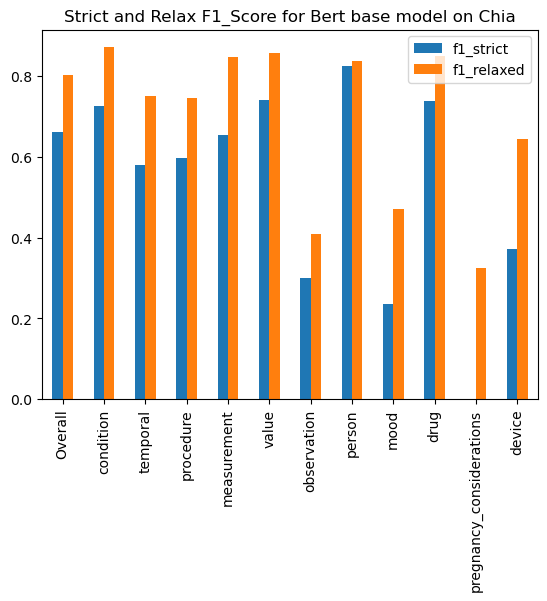

In [119]:
import matplotlib.pyplot as plt
eval_df.plot(x='type', y=['f1_strict', 'f1_relaxed'], title= f'Strict and Relax F1_Score for Bert base model on Chia', kind="bar", rot=90)
plt.xlabel("")
plt.show()

In [139]:
# Roberta model case
with open('../data/chia_roberta_log.txt') as fd:
    log = fd.read()

lines = log.split('\n')
eval_lines = [line for line in lines if 'full evaluation metrix' in line]

eval_lines

["        full evaluation metrix: {'overall': {'acc': 0.7955, 'strict': {'precision': 0.5658914728682171, 'recall': 0.6266094420600858, 'f_score': 0.594704684317719}, 'relax': {'precision': 0.7185450208706022, 'recall': 0.7956421261142291, 'f_score': 0.7551308162306125}}, 'category': {'strict': {'condition': {'precision': 0.5995575221238938, 'recall': 0.7465564738292011, 'f_score': 0.6650306748466257}, 'drug': {'precision': 0.5701559020044543, 'recall': 0.7710843373493976, 'f_score': 0.6555697823303457}, 'procedure': {'precision': 0.4103194103194103, 'recall': 0.5439739413680782, 'f_score': 0.4677871148459384}, 'temporal': {'precision': 0.47619047619047616, 'recall': 0.4605263157894737, 'f_score': 0.46822742474916385}, 'measurement': {'precision': 0.5236486486486487, 'recall': 0.5871212121212122, 'f_score': 0.5535714285714286}, 'value': {'precision': 0.6628895184135978, 'recall': 0.7155963302752294, 'f_score': 0.6882352941176472}, 'observation': {'precision': 0.5652173913043478, 'recal

In [140]:
last_eval = eval_lines[-1]
last_eval

"        full evaluation metrix: {'overall': {'acc': 0.8285, 'strict': {'precision': 0.6570648878107944, 'recall': 0.7154176295807197, 'f_score': 0.6850007902639481}, 'relax': {'precision': 0.7786537295330503, 'recall': 0.8478045559590623, 'f_score': 0.8117591275486012}}, 'category': {'strict': {'condition': {'precision': 0.7032418952618454, 'recall': 0.7768595041322314, 'f_score': 0.7382198952879582}, 'temporal': {'precision': 0.5580110497237569, 'recall': 0.6644736842105263, 'f_score': 0.6066066066066066}, 'procedure': {'precision': 0.5608465608465608, 'recall': 0.6905537459283387, 'f_score': 0.618978102189781}, 'measurement': {'precision': 0.6762589928057554, 'recall': 0.7121212121212122, 'f_score': 0.6937269372693727}, 'value': {'precision': 0.7159420289855073, 'recall': 0.7553516819571865, 'f_score': 0.7351190476190476}, 'observation': {'precision': 0.5280898876404494, 'recall': 0.2919254658385093, 'f_score': 0.37599999999999995}, 'person': {'precision': 0.7469135802469136, 'recal

In [141]:
eval_roberta = last_eval.split('full evaluation metrix: ')[1]
eval_roberta

"{'overall': {'acc': 0.8285, 'strict': {'precision': 0.6570648878107944, 'recall': 0.7154176295807197, 'f_score': 0.6850007902639481}, 'relax': {'precision': 0.7786537295330503, 'recall': 0.8478045559590623, 'f_score': 0.8117591275486012}}, 'category': {'strict': {'condition': {'precision': 0.7032418952618454, 'recall': 0.7768595041322314, 'f_score': 0.7382198952879582}, 'temporal': {'precision': 0.5580110497237569, 'recall': 0.6644736842105263, 'f_score': 0.6066066066066066}, 'procedure': {'precision': 0.5608465608465608, 'recall': 0.6905537459283387, 'f_score': 0.618978102189781}, 'measurement': {'precision': 0.6762589928057554, 'recall': 0.7121212121212122, 'f_score': 0.6937269372693727}, 'value': {'precision': 0.7159420289855073, 'recall': 0.7553516819571865, 'f_score': 0.7351190476190476}, 'observation': {'precision': 0.5280898876404494, 'recall': 0.2919254658385093, 'f_score': 0.37599999999999995}, 'person': {'precision': 0.7469135802469136, 'recall': 0.8705035971223022, 'f_score

In [155]:
import json
with open('../data/chia_roberta_eval.json', 'w') as fd:
    json.dump(eval_roberta, fd, indent=4)

In [156]:
with open('../data/chia_roberta_eval.json', 'r') as fd:
    eval_dict_roberta = json.load(fd)

In [157]:
eval_df_roberta = pd.DataFrame(columns=['type', 'prec_strict', 'rec_strict', 'f1_strict', 'prec_relaxed', 'rec_relaxed', 'f1_relaxed'])

In [158]:
types_roberta = ['Overall']
for keys in eval_dict_roberta['category']['strict']:
    types_roberta.append(keys)
types_roberta

['Overall',
 'condition',
 'temporal',
 'procedure',
 'measurement',
 'value',
 'observation',
 'person',
 'drug',
 'pregnancy_considerations',
 'device',
 'mood']

In [166]:
eval_df_roberta['type'] = types_roberta

In [159]:
pre_strict = [eval_dict_roberta['overall']['strict']['precision']]
for keys in eval_dict_roberta['category']['strict']:
    pre_strict.append(eval_dict_roberta['category']['strict'][keys]['precision'])
eval_df_roberta['prec_strict'] = pre_strict

In [160]:
rec_strict = [eval_dict_roberta['overall']['strict']['recall']]
for keys in eval_dict_roberta['category']['strict']:
    rec_strict.append(eval_dict_roberta['category']['strict'][keys]['recall'])
eval_df_roberta['rec_strict'] = rec_strict

In [161]:
f1_strict = [eval_dict_roberta['overall']['strict']['f_score']]
for keys in eval_dict_roberta['category']['strict']:
    f1_strict.append(eval_dict_roberta['category']['strict'][keys]['f_score'])
eval_df_roberta['f1_strict'] = f1_strict

In [162]:
pre_relaxed = [eval_dict_roberta['overall']['relax']['precision']]
for keys in eval_dict_roberta['category']['relax']:
    pre_relaxed.append(eval_dict_roberta['category']['relax'][keys]['precision'])
eval_df_roberta['prec_relaxed'] = pre_relaxed

In [163]:
rec_relaxed = [eval_dict_roberta['overall']['relax']['recall']]
for keys in eval_dict_roberta['category']['relax']:
    rec_relaxed.append(eval_dict_roberta['category']['relax'][keys]['recall'])
eval_df_roberta['rec_relaxed'] = rec_relaxed

In [164]:
f1_relaxed = [eval_dict_roberta['overall']['relax']['f_score']]
for keys in eval_dict_roberta['category']['relax']:
    f1_relaxed.append(eval_dict_roberta['category']['relax'][keys]['f_score'])
eval_df_roberta['f1_relaxed'] = f1_relaxed

In [167]:
eval_df_roberta

,type,prec_strict,rec_strict,f1_strict,prec_relaxed,rec_relaxed,f1_relaxed
0,Overall,0.657065,0.715418,0.685001,0.778654,0.847805,0.811759
1,condition,0.703242,0.776860,0.738220,0.833749,0.921028,0.875218
2,temporal,0.558011,0.664474,0.606607,0.693370,0.825658,0.753754
3,procedure,0.560847,0.690554,0.618978,0.677249,0.833876,0.747445
4,measurement,0.676259,0.712121,0.693727,0.805755,0.848485,0.826568
5,value,0.715942,0.755352,0.735119,0.852174,0.899083,0.875000
6,observation,0.528090,0.291925,0.376000,0.606742,0.335404,0.432000
7,person,0.746914,0.870504,0.803987,0.759259,0.884892,0.817276
8,drug,0.717617,0.834337,0.771588,0.803109,0.933735,0.863510
9,pregnancy_considerations,0.000000,0.000000,0.000000,0.428571,0.428571,0.428571


In [168]:
eval_df_roberta[1:].sort_values(by=['f1_strict'], ascending=False, ignore_index=True)

,type,prec_strict,rec_strict,f1_strict,prec_relaxed,rec_relaxed,f1_relaxed
0,person,0.746914,0.870504,0.803987,0.759259,0.884892,0.817276
1,drug,0.717617,0.834337,0.771588,0.803109,0.933735,0.863510
2,condition,0.703242,0.776860,0.738220,0.833749,0.921028,0.875218
3,value,0.715942,0.755352,0.735119,0.852174,0.899083,0.875000
4,measurement,0.676259,0.712121,0.693727,0.805755,0.848485,0.826568
5,procedure,0.560847,0.690554,0.618978,0.677249,0.833876,0.747445
6,temporal,0.558011,0.664474,0.606607,0.693370,0.825658,0.753754
7,device,0.518519,0.518519,0.518519,0.703704,0.703704,0.703704
8,observation,0.528090,0.291925,0.376000,0.606742,0.335404,0.432000
9,mood,0.240741,0.200000,0.218487,0.518519,0.430769,0.470588


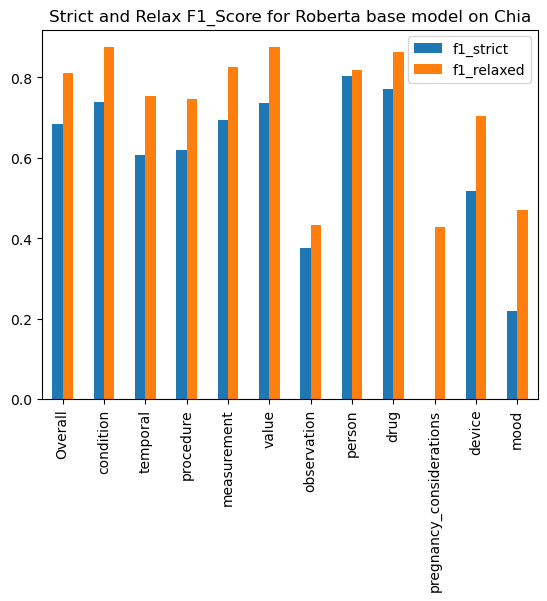

In [169]:
eval_df_roberta.plot(x='type', y=['f1_strict', 'f1_relaxed'], title= f'Strict and Relax F1_Score for Roberta base model on Chia', kind="bar", rot=90)
plt.xlabel("")
plt.show()